## 1. Generate dữ liệu

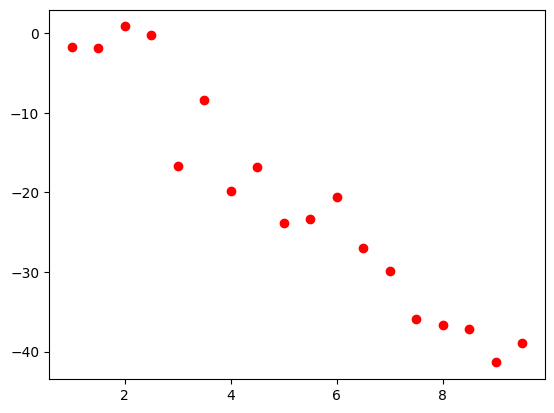

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(1.0, 10.0, 0.5)
noise = np.random.normal(0, 5.0, size=x.shape)
y = -6*x + 10 + noise

plt.plot(x,y, 'ro')

## 2. BUILD MODEL (Cài đặt mô hình)

In [ ]:
x = x.reshape((-1, 1))
x.shape

(18, 1)

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x, y)

LinearRegression()

In [ ]:
reg.coef_

array([-5.13568906])

In [ ]:
reg.intercept_

5.8822074709773595

## Trực quan hoá mô hình

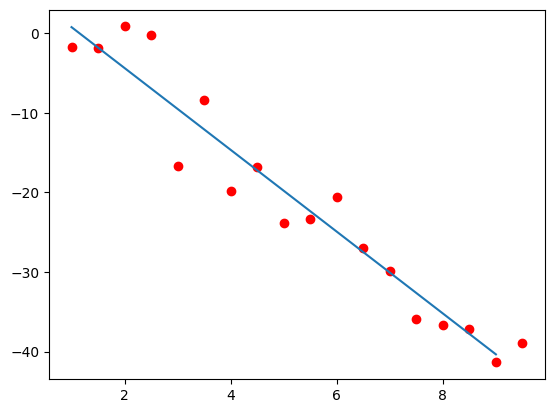

In [ ]:
# Plot các điểm
plt.plot(x[:,0],y, 'ro')
# Plot mô hình
plt.plot([1, 9], [reg.coef_[0]*1 + reg.intercept_, reg.coef_[0]*9 + reg.intercept_])

## 3. Evaluate model

In [ ]:
import math
pred = reg.predict(x)
error = np.sqrt(sum((pred - y)**2)/len(y))
error

3.6328218924537747

## 4.1 Generate dữ liệu phi tuyến

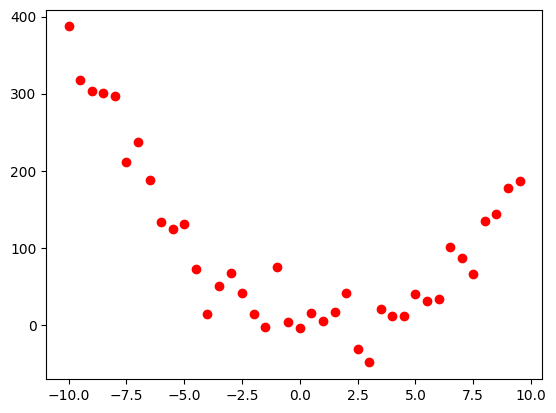

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-10.0, 10.0, 0.5)
noise = np.random.normal(0, 20.0, size=x.shape)
y = 3*x**2 - 7*x + 2 + noise

plt.plot(x,y, 'ro')
x = x.reshape((1, len(x)))

In [ ]:
x = x.reshape((-1,1))
reg = LinearRegression()
reg.fit(x, y)

LinearRegression()

In [ ]:
import math
pred = reg.predict(x)
delta = (pred-y).reshape(-1)
error = math.sqrt(((delta).dot(delta))/len(y))
print(error)

91.76232658787615


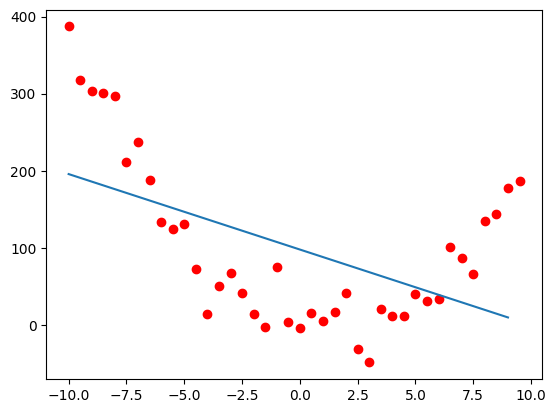

In [ ]:
# Plot các điểm
plt.plot(x[:,0],y, 'ro')

# Plot mô hình
plt.plot([-10, 9], [reg.coef_[0]*(-10) + reg.intercept_, reg.coef_[0]*9 + reg.intercept_])

## 4.2 Thêm feature (feature engineering)

# Thêm cột $x^2$

In [ ]:
X = np.concatenate((x, x**2), axis=1)
print(X.shape)

(40, 2)


Chạy lại mô hình

In [ ]:
reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

Đánh giá lại mô hình

In [ ]:
pred = reg.predict(X)
delta = (pred-y).reshape(-1)
error = math.sqrt(((delta).dot(delta))/len(y))
print(error)

25.446979988699944


In [ ]:
reg.intercept_

-0.7879657084527167

In [ ]:
reg.coef_


array([-8.31278439,  2.96171755])

Trực quan hoá mô hình sau khi đã thực hiện feature engineer thêm một cột $x^2$

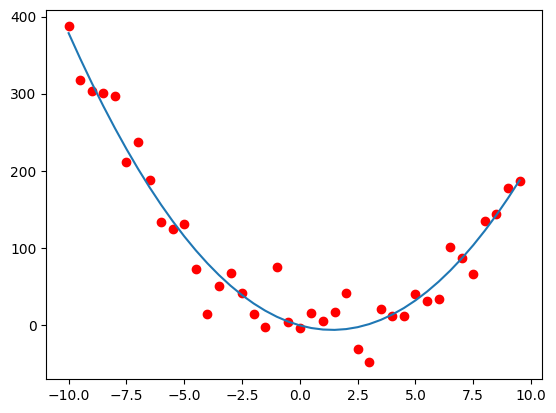

In [ ]:
x = x.reshape(-1)   # Trả lại kiểu vector trước khi plot data
# Plot các điểm
plt.plot(x,y, 'ro')
# Plot đường thẳng
plt.plot(x, x**2*reg.coef_[1]+x*reg.coef_[0]+reg.intercept_)